In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Load the CICDDoS-2019 dataset
data = pd.read_csv('/content/drive/MyDrive/dataset-1/cicddos2019_dataset.csv')
data.head()

In [ ]:
df = pd.DataFrame(data)

my_list = list(df)

print (my_list)
print (type(my_list))

['Unnamed: 0', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [ ]:
classes = ['Attack','Benign']
len(classes)

2

In [ ]:
features = data.drop(columns=['Label','Class','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min'])
target = []

In [ ]:
#df = df.reset_index()  # make sure indexes pair with number of rows

for index, row in df.iterrows():
    target.append(classes.index(row['Class']))

In [ ]:
len(target)

431371

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input features for CNN model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# Define the CNN model architecture
model = keras.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/10
5393/5393 [==============================] - 45s 8ms/step - loss: 0.0200 - accuracy: 0.9954 - val_loss: 0.0129 - val_accuracy: 0.9957
Epoch 2/10
5393/5393 [==============================] - 40s 7ms/step - loss: 0.0115 - accuracy: 0.9972 - val_loss: 0.0122 - val_accuracy: 0.9974
Epoch 3/10
5393/5393 [==============================] - 41s 8ms/step - loss: 0.0097 - accuracy: 0.9975 - val_loss: 0.0088 - val_accuracy: 0.9976
Epoch 4/10
5393/5393 [==============================] - 41s 8ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0099 - val_accuracy: 0.9977
Epoch 5/10
5393/5393 [==============================] - 38s 7ms/step - loss: 0.0097 - accuracy: 0.9979 - val_loss: 0.0081 - val_accuracy: 0.9980
Epoch 6/10
5393/5393 [==============================] - 39s 7ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.0080 - val_accuracy: 0.9979
Epoch 7/10
5393/5393 [==============================] - 44s 8ms/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.0088 - val_ac

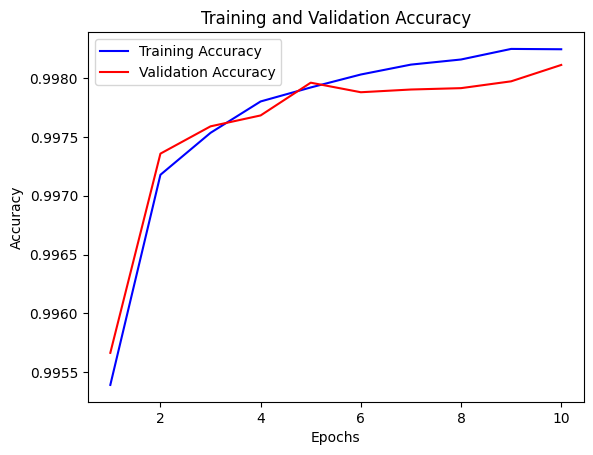

In [ ]:
# Plot the accuracy graph
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()